# 载入套件

In [1]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN

from typing import Dict
from tqdm.auto import tqdm

import numpy as np
import random
import pandas as pd
import ydata_profiling

import scienceplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.cm as cm

import torch
import os

%matplotlib inline

pd.plotting.register_matplotlib_converters()
sns.set_style("whitegrid")
sns.set_palette("RdBu")
sns.set(
    rc={'text.usetex': True},
    font="serif",
    font_scale=1.2
)

SEED = 20230723


def same_seed(seed=SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


same_seed()

features = pd.read_pickle('../Datasets/features_q1.pkl')
for aspect in ['duration', 'up_flow', 'down_flow', 'count']:
    cols = [i for i in features.columns if i.startswith(aspect)]
    features[cols] = (features[cols] - features[cols].values.mean()) / \
        features[cols].values.std()

pca = PCA(n_components=3)
pca.fit(features.drop(columns='uid'))
transformed = pca.transform(features.drop(columns='uid'))
X = transformed

model = KMeans(n_clusters=5, random_state=0,
               n_init="auto", max_iter=1000)
labels_kmeans = model.fit_predict(transformed)
labels_kmeans


array([2, 0, 0, ..., 2, 2, 0], dtype=int32)

# 群体分析

In [2]:
features = pd.read_pickle('../Datasets/features_q1.pkl')
features['cluster'] = labels_kmeans
features['cluster'] = features['cluster'].apply(lambda x: str(x))
features


,uid,duration_a,duration_b,duration_c,duration_d,duration_e,duration_f,duration_g,duration_h,duration_i,...,count_l,count_m,count_n,count_o,count_p,count_q,count_r,count_s,count_t,cluster
0,0000348F61881026FE0036840F25309F,0,0,0,170,5235,23841,42,0,0,...,0,0,2,0,397,0,0,8,0,2
1,00028CD7D203AF88C4FE4D0A83A0016E,136,113,25186,918,495,2916,2955,0,47,...,0,0,6,0,6,0,0,0,16,0
2,000343EFFAAF27FE66CAD41434814C71,0,0,4305,0,3378,3250,0,0,160,...,0,0,0,0,0,0,0,1,0,0
3,00046AA87AAF8C9971F99597ED7D90DF,12760,0,1850,6167,12621,5437,1425,0,5067,...,0,0,11,0,0,0,0,0,0,0
4,00050A1B07C0BD248726E0385D04D657,1302,0,2542,3224,0,789,511,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44248,FFF62C1EEF706DF3174EF676391E15C1,0,0,0,26796,23136,1007,5807,0,324,...,0,0,10,0,0,0,0,0,0,0
44249,FFF6689AA115DFBAA4A6D66928F93971,0,0,184,5922,1923,6327,18,0,0,...,0,0,1,0,0,0,0,0,0,0
44250,FFF82C898EE523DA1F4137097FECCB20,688,0,0,1191,12839,12035,2432,198,46,...,0,0,57,2,12,0,0,0,0,2
44251,FFFA25131B53BDF8B855AB4D473E29C2,9005,647,1,1360,0,25809,13512,0,12640,...,0,0,6,0,3,0,0,5,3,2


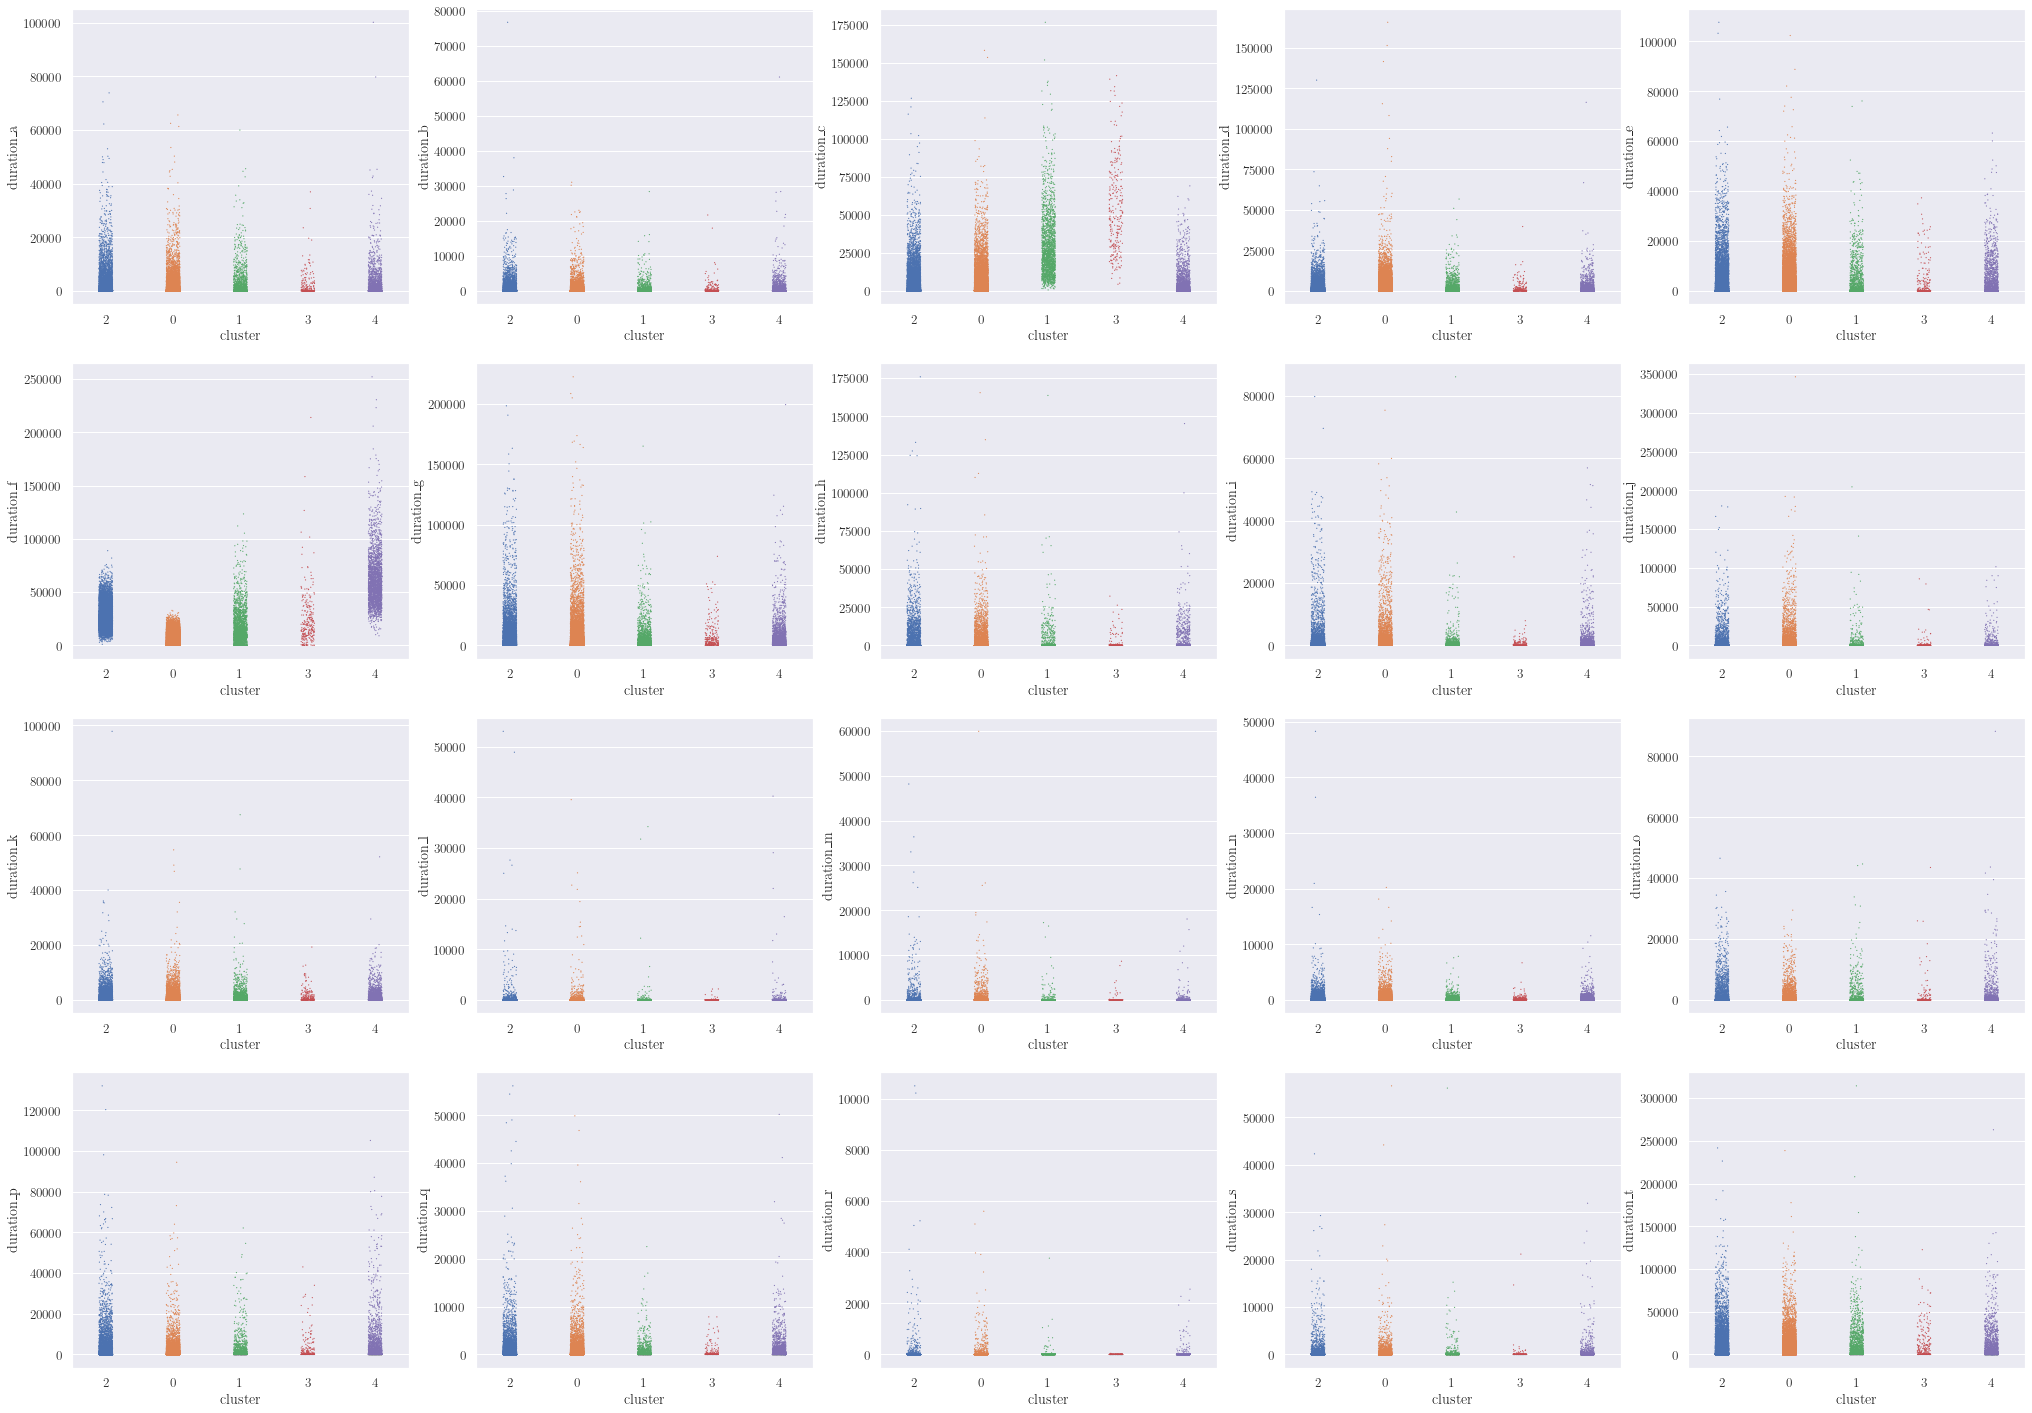

In [20]:
fig, axes = plt.subplots(4, 5, figsize=(35, 25))
aspect = 'duration'

for ax, y in zip(axes.flatten(), [i for i in features.columns if i.startswith(aspect)]):
    sns.stripplot(
        ax=ax,
        data=features,
        x='cluster',
        y=y,
        hue="cluster",
        size=1.2,
        alpha=0.95
    )

    ax.legend([], [], frameon=False)

plt.savefig("../Thesis/figures/stripplot_duration_cluster.pdf",
            dpi=100, bbox_inches='tight', pad_inches=0.005)


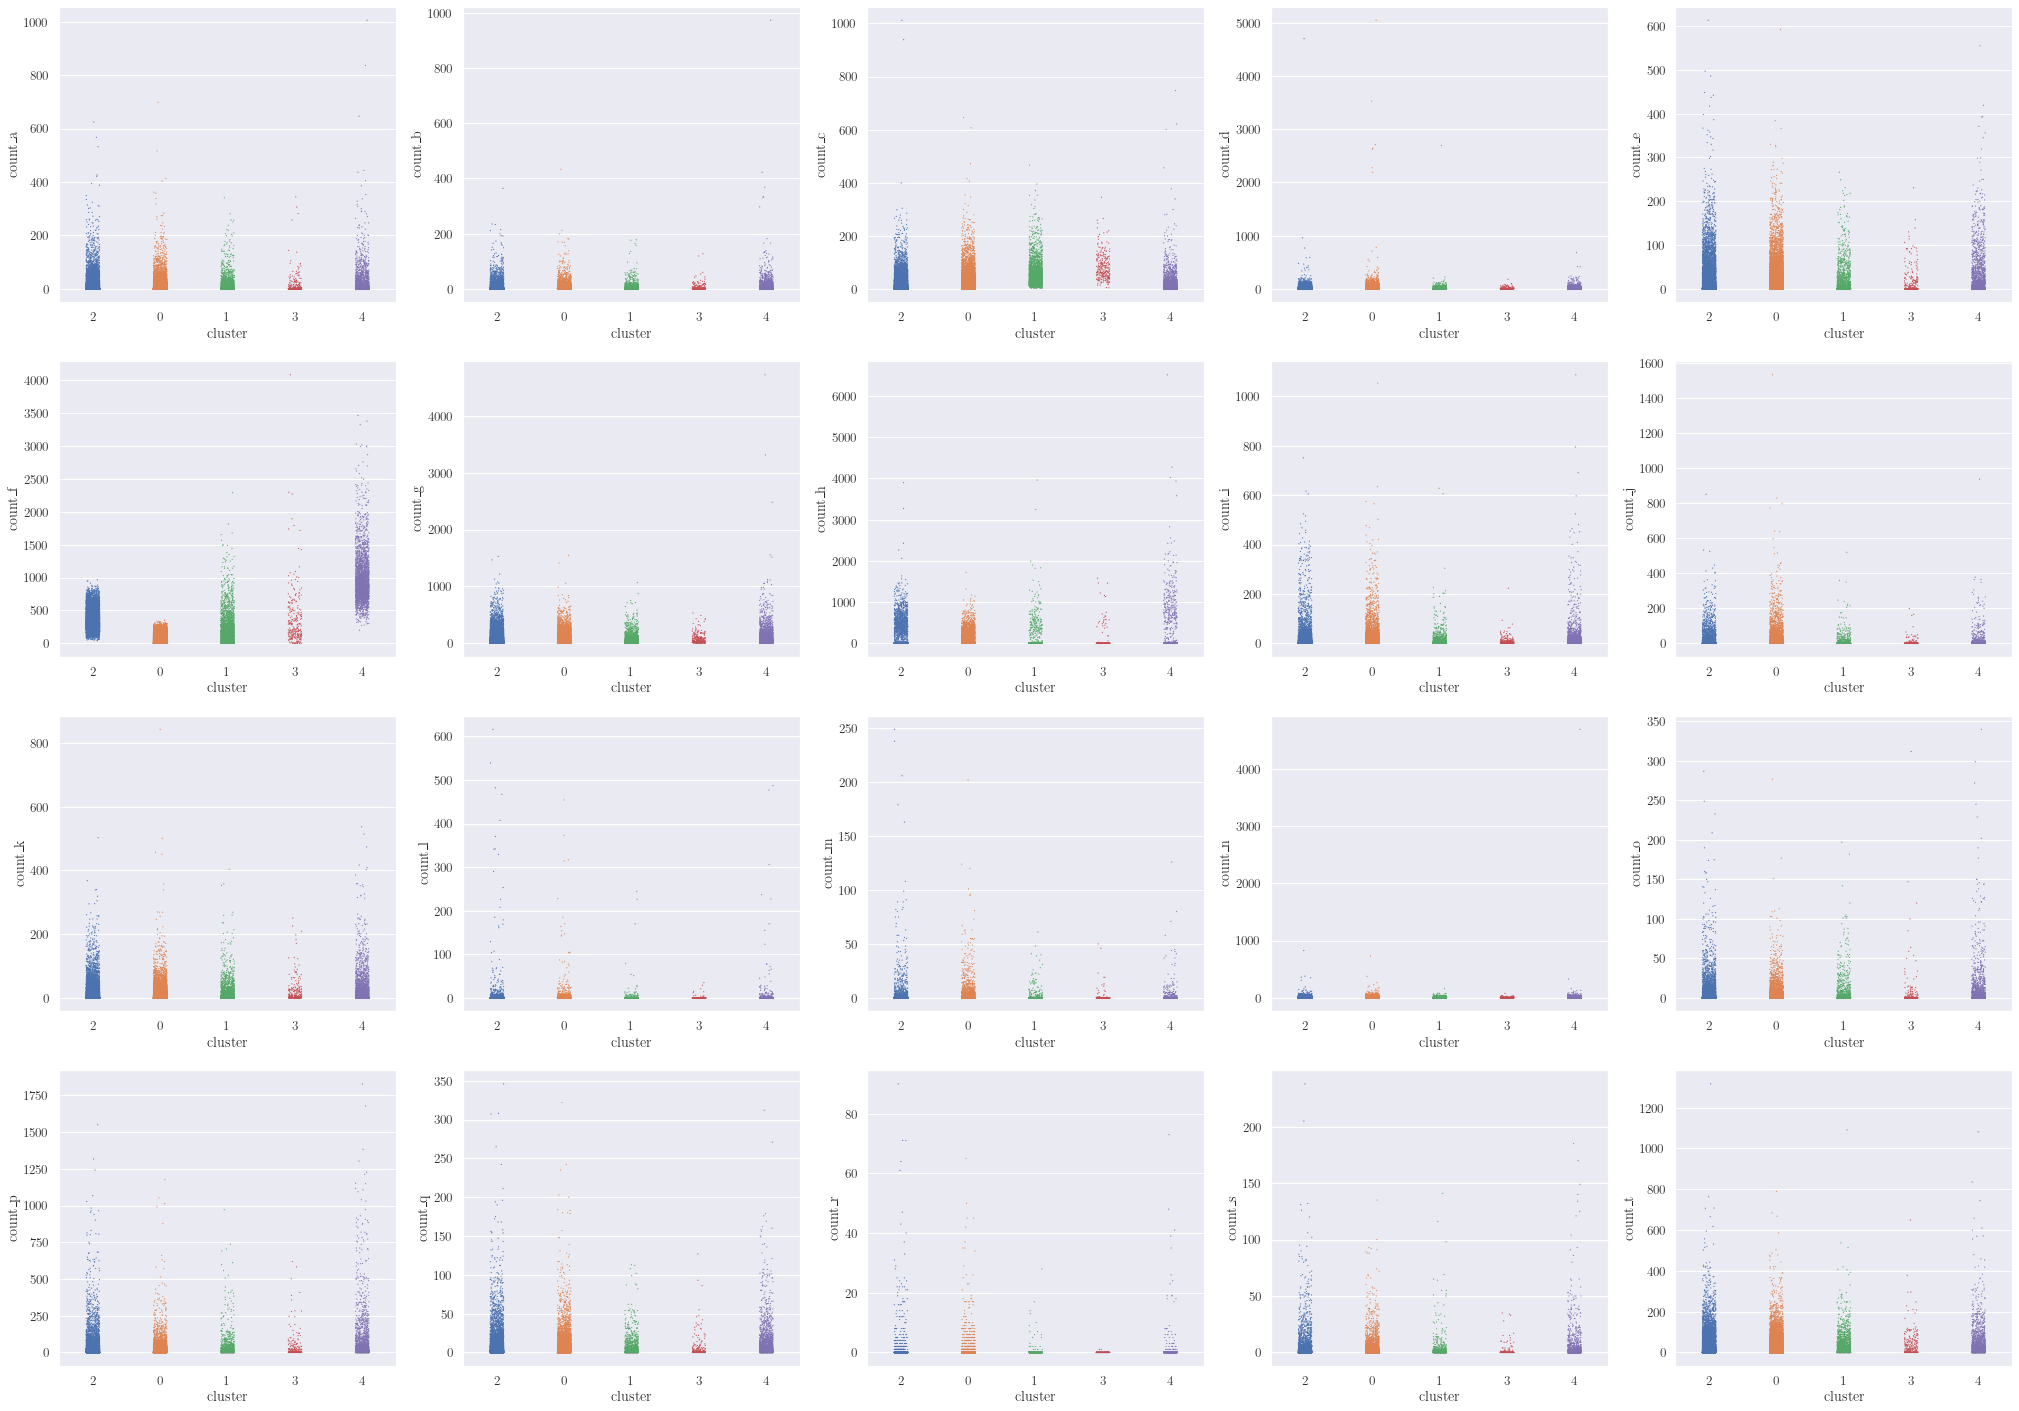

In [22]:
fig, axes = plt.subplots(4, 5, figsize=(35, 25))
aspect = 'count'

for ax, y in zip(axes.flatten(), [i for i in features.columns if i.startswith(aspect)]):
    sns.stripplot(
        ax=ax,
        data=features,
        x='cluster',
        y=y,
        hue="cluster",
        size=1.2,
        alpha=0.95
    )

    ax.legend([], [], frameon=False)

plt.savefig("../Thesis/figures/stripplot_count_cluster.pdf",
            dpi=100, bbox_inches='tight', pad_inches=0.005)


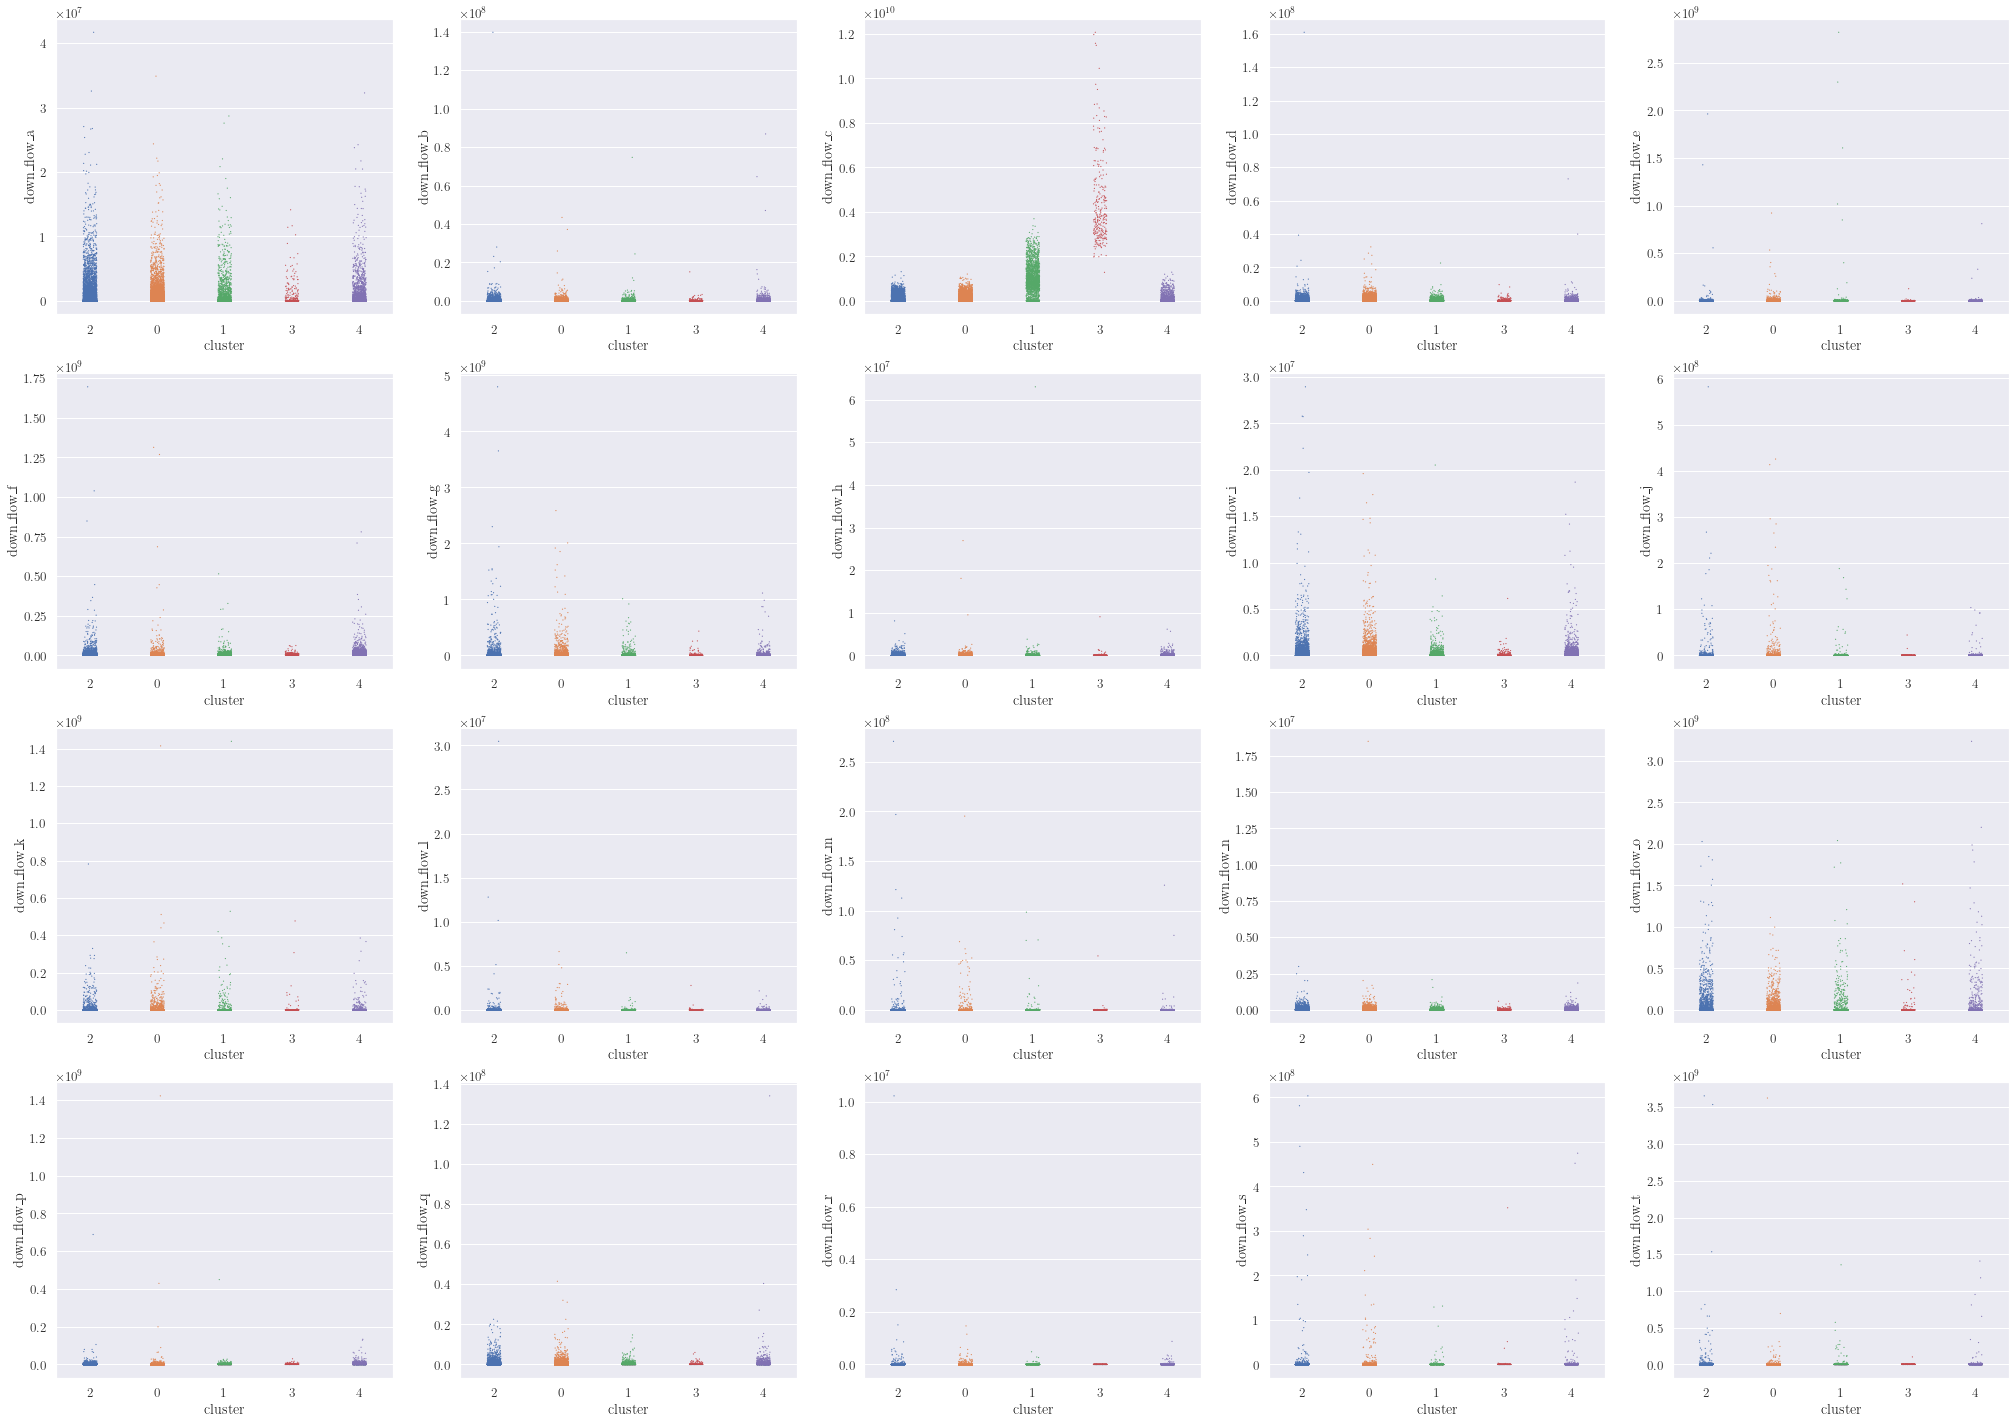

In [21]:
fig, axes = plt.subplots(4, 5, figsize=(35, 25))
aspect = 'down_flow'

for ax, y in zip(axes.flatten(), [i for i in features.columns if i.startswith(aspect)]):
    sns.stripplot(
        ax=ax,
        data=features,
        x='cluster',
        y=y,
        hue="cluster",
        size=1.2,
        alpha=0.95
    )

    ax.legend([], [], frameon=False)

plt.savefig("../Thesis/figures/stripplot_down_flow_cluster.pdf",
            dpi=100, bbox_inches='tight', pad_inches=0.005)
